# CS F429 - NLP Project
Project 1: Grammar Check for English Language

## Problem Statement
Part 1: Build a grammar checker using the concepts taught in class, you will be given a corpus with some paragraphs labeled
correct and unknown; correct paragraphs have no grammatical errors, while unknown may/may not have sentences
which have grammatical errors in them. The task is to find all the sentences that have these errors. For example: “In the
country there lived a fox. The quick brown fox jump over the fence. Farmer Shaun was terrified.” In this paragraph, the
sentence “The quick brown fox jump over the fence” is grammatically incorrect.

## Introduction

### Importing libraries

In [1]:
!pip install dill
!pip install -U nltk

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: nltk in /home/adarshnandanwar/.local/lib/python3.8/site-packages (3.6.5)


In [2]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import random
import time
import nltk
import spacy
import ssl
from numpy import inf

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('punkt')
nltk.download('brown')
from nltk.corpus import brown

# from google.colab import drive
# drive.mount('/content/gdrive')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/adarshnandanwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /home/adarshnandanwar/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [3]:
# BASE_DIR = 'gdrive/MyDrive/nlp_project'
BASE_DIR = os.getcwd()
DATASET_PATH = os.path.join(BASE_DIR, 'dataset', 'NLP_Q1')
CLEAN_DATASET_PATH = os.path.join(DATASET_PATH, 'clean')
UNKNOWN_DATASET_PATH = os.path.join(DATASET_PATH, 'unknown')

PRINT_LIMIT = 3

### Importing dataset

In [4]:
# Extracting dataset
from zipfile import ZipFile

if not os.path.isdir(DATASET_PATH):
    dataset_zip_path = os.path.join(BASE_DIR, 'dataset', 'Topic 1.zip')
    dataset_extrat_path = os.path.join(BASE_DIR, 'dataset')
    with ZipFile(dataset_zip_path, 'r') as zip:
        zip.printdir()
        zip.extractall(dataset_extrat_path)
        print('Done!')
else:
    print('Dataset already extracted')

Dataset already extracted


In [5]:
clean_text_list = []
for file_name in os.listdir(CLEAN_DATASET_PATH):
    text = open(os.path.join(CLEAN_DATASET_PATH, file_name)).read()
    clean_text_list.append(text)

print(f'Size of clean dataset: {len(clean_text_list)}\n')
print('\n\n'.join(clean_text_list[:PRINT_LIMIT]))

Size of clean dataset: 6969

The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .

It urged that the next Legislature `` provide enabling funds and re-set the effective date so that an orderly implementation of the law may be effected '' .

The grand jury took a swipe at the State Welfare Department's handling of federal funds granted for child welfare services in foster homes .


In [6]:
unknown_text_list = []
for file_name in os.listdir(UNKNOWN_DATASET_PATH):
    text = open(os.path.join(UNKNOWN_DATASET_PATH, file_name)).read()
    unknown_text_list.append(text)

print(f'Size of unknown dataset: {len(unknown_text_list)}\n')
print('\n\n'.join(unknown_text_list[:PRINT_LIMIT]))

Size of unknown dataset: 8698

The Fulton County Grand Jury say Friday an investigation of Atlanta 's recent primary election produced ` ` no evidence '' that any irregularities took place .

` ` This is one of the major items in the Fulton County general assistance program '' , the jury said , but the State Welfare Department ` ` has seen fit to distribute these funds through the welfare departments of all the counties in the state with the exception of Fulton County , which receives reform none of this money .

The jurors said they realize ` ` a proportionate distribution of these funder might disable this program in our less populous counties '' .


In [7]:
from nltk.tokenize import sent_tokenize

def segmentation(corpus):
    segmented_corpus = []
    map_to_corpus_index = []
    for i, text in enumerate(corpus):
        splits = sent_tokenize(text)
        segmented_corpus.extend(splits)
        map_to_corpus_index.extend([i for x in range(len(splits))])
    return segmented_corpus, map_to_corpus_index

In [8]:
from nltk.tokenize import word_tokenize

def tokenization(segmented_corpus):
    tokenized_corpus = []
    for text in segmented_corpus:
        tokenized_corpus.append(word_tokenize(text))
    return tokenized_corpus

In [9]:
from nltk.tokenize import sent_tokenize

segmented_clean_text_list, map_to_corpus_index = segmentation(clean_text_list)
tokenized_clean_text_list = tokenization(segmented_clean_text_list)

print('Segmentation of clean data\n')
print('\n'.join(segmented_clean_text_list[:PRINT_LIMIT]))
print('\n\nTokenization of clean data\n')
for i in range(PRINT_LIMIT):
    print(tokenized_clean_text_list[i])

Segmentation of clean data

The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
It urged that the next Legislature `` provide enabling funds and re-set the effective date so that an orderly implementation of the law may be effected '' .
The grand jury took a swipe at the State Welfare Department's handling of federal funds granted for child welfare services in foster homes .


Tokenization of clean data

['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', '``', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['It', 'urged', 'that', 'the', 'ne

In [10]:
segmented_unknown_text_list, map_to_corpus_index = segmentation(unknown_text_list)
tokenized_unknown_text_list = tokenization(segmented_unknown_text_list)
print('Segmentation of unknown data\n')
print('\n'.join(segmented_clean_text_list[:PRINT_LIMIT]))
print('\n\nTokenization of unknown data\n')
for i in range(PRINT_LIMIT):
    print(tokenized_clean_text_list[i])

Segmentation of unknown data

The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
It urged that the next Legislature `` provide enabling funds and re-set the effective date so that an orderly implementation of the law may be effected '' .
The grand jury took a swipe at the State Welfare Department's handling of federal funds granted for child welfare services in foster homes .


Tokenization of unknown data

['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', '``', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['It', 'urged', 'that', 'the',

### Dataset analysis

In [11]:
# Building list of all tokens in training data
token_list_clean = list()
for i in range(len(tokenized_clean_text_list)):
    token = tokenized_clean_text_list[i]
    for j in range(len(token)):
        token_list_clean.append(token[j])
        
# Building set of all tokens in training data
token_set_clean = set()
for i in range(len(tokenized_clean_text_list)):
    token = tokenized_clean_text_list[i]
    for j in range(len(token)):
        token_set_clean.add(token[j])

In [12]:
# Building list of all tokens in test data
token_list_test = list()
for i in range(len(tokenized_unknown_text_list)):
    token = tokenized_unknown_text_list[i]
    for j in range(len(token)):
        token_list_test.append(token[j])

# Building set of all tokens in test data
token_set_test = set()
for i in range(len(tokenized_unknown_text_list)):
    token = tokenized_unknown_text_list[i]
    for j in range(len(token)):
        token_set_test.add(token[j])

In [13]:
# Calculating function words in test set
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
num_function_words = 0
for i in range(len(token_list_clean)):
    if(token_list_clean[i] not in sw_spacy):
        num_function_words+=1

print(f"Number of function words: ", num_function_words)

Number of function words:  299033


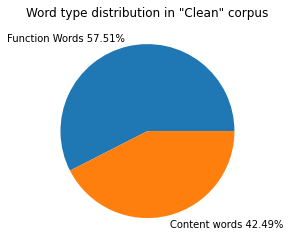

In [14]:
import matplotlib.pyplot as plt
import numpy as np
function_word_percent = round(num_function_words/(len(token_list_clean)) * 100,2)
content_word_percent = round((len(token_list_clean)-num_function_words)/(len(token_list_clean)) * 100,2)
y = np.array([num_function_words, len(token_list_clean)-num_function_words])
mylabels = ["Function Words "+str(function_word_percent)+"%", "Content words "+str(content_word_percent)+"%"]

plt.pie(y, labels = mylabels)
plt.title('Word type distribution in "Clean" corpus')
plt.show()

In [15]:
# Demonstrating Zipf's law
def CountFrequency(my_list):
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

In [16]:
mp = CountFrequency(token_list_test)

num_list = []
for key in mp.keys():
    num_list.append(mp[key])

num_list.sort(reverse = True)
num_list = num_list[:80]

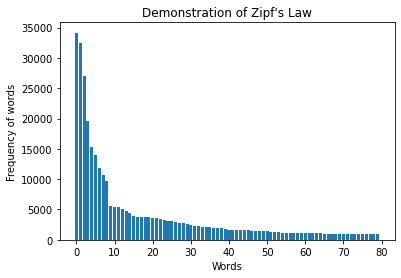

In [17]:
plt.bar(list(range(len(num_list))),num_list)
plt.xlabel("Words")
plt.ylabel("Frequency of words")
plt.title("Demonstration of Zipf's Law")
plt.show()

In [18]:
# Calculation of unknown words in test set

num_unknown_words = 0
test_tokens = list(token_set_test)
clean_tokens = list(token_set_clean)
for i in range(len(test_tokens)):
    if(test_tokens[i] not in clean_tokens):
        num_unknown_words+= mp[test_tokens[i]]

print(f"Number of unknown words: ", num_unknown_words)

Number of unknown words:  45107


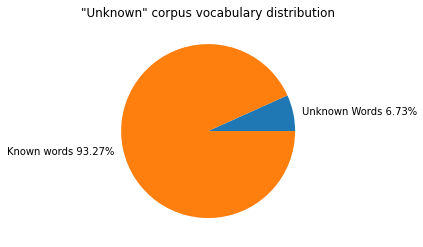

In [19]:
unknown_word_percent = round(num_unknown_words/(len(token_list_test)) * 100,2)
known_word_percent = round((len(token_list_test)-num_unknown_words)/(len(token_list_test)) * 100,2)
y = np.array([num_unknown_words, len(token_list_test)-num_unknown_words])
mylabels = ["Unknown Words "+str(unknown_word_percent)+"%", "Known words "+str(known_word_percent)+"%"]
plt.pie(y, labels = mylabels)
plt.title('"Unknown" corpus vocabulary distribution')
plt.show()

## POS Tagging

### 1. Hiden Markov Model
We can use hidden markov model to do POS tagging on the token. In the below function, we first find the required probabilities (emission probability, transition probability) using the brown corpus made available by nltk library and use these probabilities to do POS tagging on the given training and testing dataset using Viterbi algorithm.

In [20]:
def training_hmm():
    
    print('Training HMM model ......')
    
    sent_tag = brown.tagged_sents()
    train_data=[]
    for s in sent_tag:
        s.insert(0,('<s>','<s>'))
        s.append(('</s>','</s>'))
        train_data.append(s)
    
    train_word_tag = {}
    for s in train_data:
        for (w,t) in s:
            w=w.lower()
            try:
                try:
                    train_word_tag[t][w]+=1
                except:
                    train_word_tag[t][w]=1
            except:
                train_word_tag[t]={w:1}
        
    train_emission_prob={}
    for k in train_word_tag.keys():
        train_emission_prob[k]={}
        count = sum(train_word_tag[k].values())
        for k2 in train_word_tag[k].keys():
            train_emission_prob[k][k2]=train_word_tag[k][k2]/count
            
    print('Calculated emission probability .........')
            
    bigram_tag_data = {}
    for s in train_data:
        bi=list(nltk.bigrams(s))
        for b1,b2 in bi:
            try:
                try:
                    bigram_tag_data[b1[1]][b2[1]]+=1
                except:
                    bigram_tag_data[b1[1]][b2[1]]=1
            except:
                bigram_tag_data[b1[1]]={b2[1]:1}
                
    bigram_tag_prob={}
    for k in bigram_tag_data.keys():
        bigram_tag_prob[k]={}
        count=sum(bigram_tag_data[k].values())
        for k2 in bigram_tag_data[k].keys():
            bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count
            
    print('Calculated bigram transition probability .........')
            
    
    tags_of_tokens = {}
    count=0
    for s in train_data:
        for (w,t) in s:
            w=w.lower()
            try:
                if t not in tags_of_tokens[w]:
                    tags_of_tokens[w].append(t)
            except:
                l = []
                l.append(t)
                tags_of_tokens[w] = l
    
    print('Model training completed .........')
    
    return bigram_tag_prob, train_emission_prob, tags_of_tokens

In [21]:
def find_pos_tags_hmm(bigram_tag_prob, train_emission_prob, tags_of_tokens, string_seq):
    string_seq.append('</s>')
    string_seq.insert(0,'<s>')
    s = string_seq
    # storing_values is a dictionary which stores the required values          
    storing_values = {}              
    for q in range(len(s)):
        step = s[q]
        # for the starting word of the sentence
        if q == 1:                
            storing_values[q] = {}
            try:
                tags = tags_of_tokens[step]
            except:
                # print(step+'.....')
                tags = ['UNK']
            for t in tags:
                # this is applied since we do not know whether the word in the test data is present in train data or not
                try:
                    storing_values[q][t] = ['<s>',bigram_tag_prob['<s>'][t]*train_emission_prob[t][step]]
                # if word is not present in the train data but present in test data we assign a very low probability of 0.0001
                except:
                    storing_values[q][t] = ['<s>',0.0001]
    
        # if the word is not at the start of the sentence
        if q>1:
            storing_values[q] = {}
            previous_states = list(storing_values[q-1].keys())  
            try:
                current_states  = tags_of_tokens[step]      
            except:
                current_states = ['UNK']
            # calculation of the best previous state for each current state and then storing it in storing_values
            for t in current_states:                             
                temp = []
                for pt in previous_states:                         
                    try:
                        temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
                    except:
                        temp.append(storing_values[q-1][pt][1]*0.0001)
                max_temp_index = temp.index(max(temp))
                best_pt = previous_states[max_temp_index]
                storing_values[q][t]=[best_pt,max(temp)]

    # Backtracing to extract the best possible tags for the sentence
    pred_tags = []
    total_steps_num = storing_values.keys()
    last_step_num = max(total_steps_num)
    for bs in range(len(total_steps_num)):
        step_num = last_step_num - bs
        if step_num == last_step_num:
            pred_tags.append('</s>')
            pred_tags.append(storing_values[step_num]['</s>'][0])
        if step_num<last_step_num and step_num>0:
            pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
    return list(reversed(pred_tags[1:-1]))

In [22]:
bigram_tag_prob, train_emission_prob, tags_of_tokens = training_hmm()

Training HMM model ......
Calculated emission probability .........
Calculated bigram transition probability .........
Model training completed .........


In [23]:
# Sentence sequence should be like ['<s>' , '.........' , '........' , '</s>']
find_pos_tags_hmm(bigram_tag_prob, train_emission_prob, tags_of_tokens, ['that','is','a','human'])

['DT', 'BEZ', 'AT', 'JJ']

### Method 2. Spacy Library
We can use spacy `en_core_web_sm` which is a english pipeline trained on various corpora to do POS tagging on the given training and testing dataset.

In [24]:
def training_spacy_pos():
    print('Training spacy model ......')
    nlp_spacy = spacy.load("en_core_web_sm")
    print('Training spacy model completed ......')
    return nlp_spacy

In [25]:
def find_pos_tags_spacy(nlp_spacy , text):
    text = ' '.join(text)
    doc = nlp_spacy(text)
    token = [token.tag_  for token in doc]    
    return token

In [26]:
nlp_spacy = training_spacy_pos()

Training spacy model ......
Training spacy model completed ......


In [27]:
# Sentence sequence should be like ['<s>' , '.........' , '........' , '</s>']
find_pos_tags_spacy(nlp_spacy , ['that','is','a','sample', 'text'])

['DT', 'VBZ', 'DT', 'NN', 'NN']

## Language Model

### Importing dataset

In [28]:
clean_text_list = []
for file_name in os.listdir(CLEAN_DATASET_PATH):
    text = open(os.path.join(CLEAN_DATASET_PATH, file_name)).read()
    clean_text_list.append(text)

print(f'Size of clean dataset: {len(clean_text_list)}\n')
print('\n\n'.join(clean_text_list[:PRINT_LIMIT]))

Size of clean dataset: 6969

The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .

It urged that the next Legislature `` provide enabling funds and re-set the effective date so that an orderly implementation of the law may be effected '' .

The grand jury took a swipe at the State Welfare Department's handling of federal funds granted for child welfare services in foster homes .


In [29]:
unknown_text_list = []
for file_name in os.listdir(UNKNOWN_DATASET_PATH):
    text = open(os.path.join(UNKNOWN_DATASET_PATH, file_name)).read()
    unknown_text_list.append(text)

print(f'Size of clean dataset: {len(unknown_text_list)}\n')
print('\n\n'.join(unknown_text_list[:PRINT_LIMIT]))

Size of clean dataset: 8698

The Fulton County Grand Jury say Friday an investigation of Atlanta 's recent primary election produced ` ` no evidence '' that any irregularities took place .

` ` This is one of the major items in the Fulton County general assistance program '' , the jury said , but the State Welfare Department ` ` has seen fit to distribute these funds through the welfare departments of all the counties in the state with the exception of Fulton County , which receives reform none of this money .

The jurors said they realize ` ` a proportionate distribution of these funder might disable this program in our less populous counties '' .


### Segmentation and Tokenization

In [30]:
from nltk.tokenize import sent_tokenize

def segmentation(corpus):
    segmented_corpus = []
    map_to_corpus_index = []
    for i, text in enumerate(corpus):
        splits = sent_tokenize(text)
        segmented_corpus.extend(splits)
        map_to_corpus_index.extend([i for x in range(len(splits))])
    return segmented_corpus, map_to_corpus_index

In [31]:
from nltk.tokenize import word_tokenize

def tokenization(segmented_corpus):
    tokenized_corpus = []
    for text in segmented_corpus:
        tokenized_corpus.append(word_tokenize(text))
    return tokenized_corpus

In [32]:
from nltk.tokenize import sent_tokenize

segmented_clean_text_list, map_to_corpus_index = segmentation(clean_text_list)
tokenized_clean_text_list = tokenization(segmented_clean_text_list)

print('Segmentation\n')
print('\n'.join(segmented_clean_text_list[:PRINT_LIMIT]))
print('\n\nTokenization\n')
for i in range(PRINT_LIMIT):
    print(tokenized_clean_text_list[i])

Segmentation

The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
It urged that the next Legislature `` provide enabling funds and re-set the effective date so that an orderly implementation of the law may be effected '' .
The grand jury took a swipe at the State Welfare Department's handling of federal funds granted for child welfare services in foster homes .


Tokenization

['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', '``', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['It', 'urged', 'that', 'the', 'next', 'Legislature', '``', 'p

### N-gram Model

In [33]:
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.util import pad_sequence
from nltk.lm import Laplace
from nltk.lm import MLE
from nltk.lm import Vocabulary
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten

In [34]:
def convert_to_pos_tags(tokenized_corpus, pos_type=None):
    # POS tagging
    pos_tag_corpus = []
    if pos_type == 'hmm':
        print("Replacing tokens with POS tags using HMM")
        for sequence in tokenized_corpus:
            pos_tag_corpus.append(find_pos_tags_hmm(bigram_tag_prob, train_emission_prob, tags_of_tokens, sequence))
        return pos_tag_corpus
    elif pos_type == 'spacy':
        print("Replacing tokens with POS tags using spacy")
        for sequence in tokenized_corpus:
            pos_tag_corpus.append(find_pos_tags_spacy(nlp_spacy, sequence))
        return pos_tag_corpus
    else:
        print("POS tagging method not selected. No changes made.")
        return tokenized_corpus

In [35]:
def train_ngram_model(n_value, tokenized_corpus, verbose=False):
    print(f'Sequences in corpus:\t{len(tokenized_corpus)}')
    total_tokens = 0
    for sequence in tokenized_corpus:
        total_tokens += len(sequence)
    print(f'Total tokens in corpus:\t{total_tokens}')
    
    # padding <s> and </s>
    print("Padding sequences with <s> and </s> tokens")
    padded_sequences = []
    for i in range(len(tokenized_corpus)):
        padded_tokens = list(pad_sequence(tokenized_corpus[i],
                                          pad_left=True, left_pad_symbol="<s>",
                                          pad_right=True, right_pad_symbol="</s>",
                                          n=n_value))
        padded_sequences.append(padded_tokens)
    if verbose:
        print('eg.', padded_sequences[0])
            
    # create vocabulary
    print("Creating vocabulary")
    vocabulary = list(flatten(padded_sequences))
    print('Flattened sequence size\t', len(vocabulary))
    print('Flattened sequence set size\t', len(set(vocabulary)))
    # replace tokens below cutoff freq with <UNK> token
    vocab = Vocabulary(vocabulary, unk_cutoff=2)
    print('Vocabulary with <UNK> cutoff size\t', len(vocab))
    
    # grouping into group size of `n_value`
    print("Creating n-grams")
    ngram_sequences = []
    for text in padded_sequences:
        ngram_sequences.append(list(ngrams(text, n=n_value)))
    if verbose:
        print('eg.', ngram_sequences[0][:PRINT_LIMIT])
    
    total_ngrams = 0
    for sequence in ngram_sequences:
        total_ngrams += len(sequence)
    print(f'Total ngram sequences:\t{len(ngram_sequences)}\nTotal ngrams:\t{total_ngrams}')
        
    # language model
    print("Creating language model")
    model = Laplace(n_value)
    model.fit(ngram_sequences, vocab)
    print(f'Model vocab size:\t{len(model.vocab)}')
    # print(f"Grand total number of ngrams stored:\t{model.N()}")
    print(f'Total n-grams of size {n_value} in model:\t', len(model.counts[n_value].items()))
    
    sequence_scores = []
    for ngram_sequence in ngram_sequences:
        sequence_score = 0
        for group in ngram_sequence:
            score = model.logscore(group[-1], group[:-1])
            sequence_score += score
        sequence_scores.append(sequence_score)
        
    return {
        'padded_sequences': padded_sequences,
        'vocabulary': vocab,
        'ngram_sequences': ngram_sequences,
        'model': model,
        'sequence_scores': sequence_scores
    }    

In [36]:
# def filter_using_token_score(n_value, model, ngram_sequences, log_cutoff, verbose=False):
#     # finding suspect ngrams using individual token cutoffs
    
#     print('Filtering sequences based on individual token scores')
#     suspect_entries = []
#     suspect_sequences = []
#     for ngram_sequence in ngram_sequences:
#         is_suspect = False
#         for group in ngram_sequence:
#             score = model.logscore(group[-1], group[:-1])
#             if score < log_cutoff:
#                 is_suspect = True
#                 suspect_entries.append({
#                     'token': group[-1],
#                     'context': group[:-1],
#                     'sequence': ngram_sequence,
#                     'score': score
#                 })
#         if is_suspect:
#             suspect_sequences.append(ngram_sequence)
#     if verbose:
#         print(f'Suspect sequences based on individual token scores:\t{len(suspect_sequences)}/{len(ngram_sequences)}')
#     return suspect_entries, suspect_sequences

In [37]:
def filter_using_sequence_score(n_value, ngram_sequences, sequence_scores, log_cutoff, verbose=False):
    # finding suspect sequences using sequence cutoffs
    
    print('Filtering sequences based on sequence scores')
    suspect_indexes = []
    for i in range(len(ngram_sequences)):
        if sequence_scores[i] < log_cutoff:
            suspect_indexes.append(i)
    if verbose:
        print(f'Suspect sequences based on sequence scores:\t{len(suspect_indexes)}/{len(ngram_sequences)}')
    return suspect_indexes

In [38]:
def plot_continuous_freq_dist(values, xlabel, ylabel, title, bins=50, cutoff=None):
    # plot freq distribution for cutoff visualization
    plt.rcParams.update({'figure.figsize':(10, 3)})
    plt.hist(values, bins=bins)
    if cutoff:
        plt.axvline(x=cutoff, color='red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel);
    plt.show()

In [39]:
def get_sequence_score_cutoff(sequence_scores, alpha=0.05):
    scores = sequence_scores.copy()
    n = len(scores)
    scores.sort()
    index = max(0, min(n-1, int(n*alpha)))
    return scores[index]

In [40]:
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# token_log_cutoffs = {1: -30, 2: -21, 3: -30, 4: -25}
# alpha: used to calculate score cutoff
alpha = 0.03
pos_type = 'hmm'

In [41]:
def train_lm(n_values, train_corpus, alpha):
    ngram_data = dict()
    for n_value in n_values:
        print(f"Training {n_value}-gram model")
        ngram_model_info = train_ngram_model(n_value, train_corpus, verbose=False)
        ngram_data[n_value] = ngram_model_info

        # filter_using_token_score(n_value, ngram_model_info['model'], ngram_model_info['ngram_sequences'], token_log_cutoffs[n_value], verbose=True)

        sequence_score_log_cutoff = get_sequence_score_cutoff(ngram_model_info['sequence_scores'], alpha=alpha)
        filter_using_sequence_score(n_value, ngram_model_info['ngram_sequences'], ngram_model_info['sequence_scores'], 
                                    sequence_score_log_cutoff, verbose=True)
        print(f'Sequence score cutoff:\t{sequence_score_log_cutoff}\n')
        ngram_data[n_value]['score_cutoff'] = sequence_score_log_cutoff

        plot_continuous_freq_dist(ngram_model_info['sequence_scores'], xlabel='Sequence score', 
                                  ylabel='Frequency', title='Sequence score frequency distribution', bins=200, 
                                  cutoff=sequence_score_log_cutoff)
    return ngram_data

Training 1-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 519936
Flattened sequence set size	 35849
Vocabulary with <UNK> cutoff size	 18672
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	519936
Creating language model
Model vocab size:	18673
Total n-grams of size 1 in model:	 18672
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-519.9445501829066



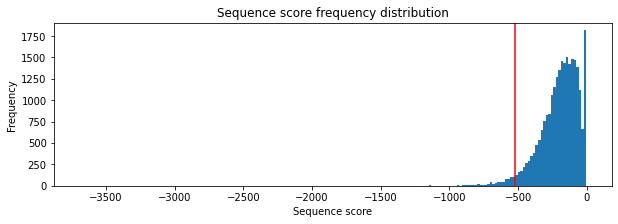

Training 2-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 570728
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	545332
Creating language model
Model vocab size:	18675
Total n-grams of size 2 in model:	 18673
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-583.4566146147223



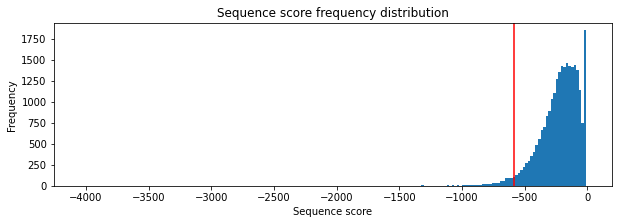

Training 3-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 621520
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	570728
Creating language model
Model vocab size:	18675
Total n-grams of size 3 in model:	 212612
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-684.8529544345866



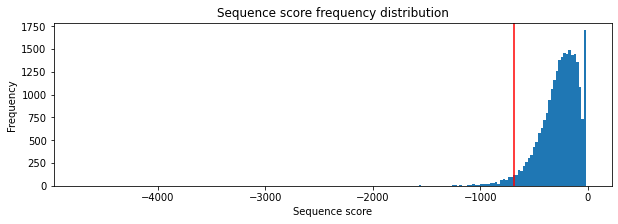

Training 4-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 672312
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	596124
Creating language model
Model vocab size:	18675
Total n-grams of size 4 in model:	 404134
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-717.0824687742212



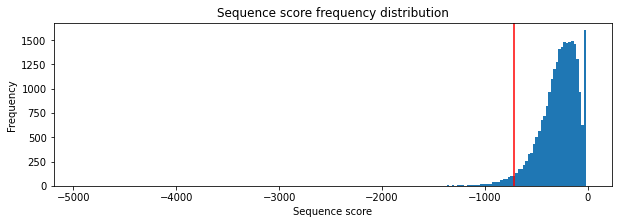

Training 5-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 723104
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	621520
Creating language model
Model vocab size:	18675
Total n-grams of size 5 in model:	 487035
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-732.0293525441979



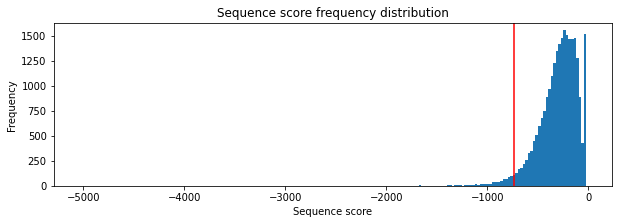

Training 6-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 773896
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	646916
Creating language model
Model vocab size:	18675
Total n-grams of size 6 in model:	 522924
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-745.6523385268873



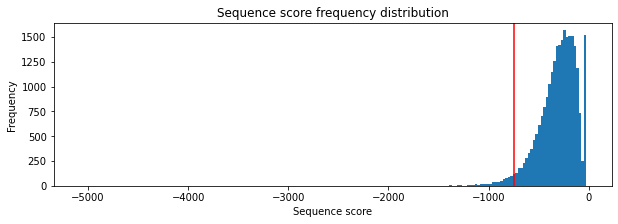

Training 7-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 824688
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	672312
Creating language model
Model vocab size:	18675
Total n-grams of size 7 in model:	 548921
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-758.8412364001296



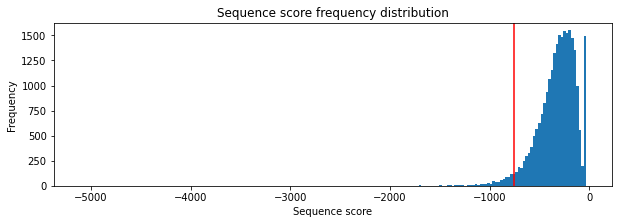

Training 8-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 875480
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	697708
Creating language model
Model vocab size:	18675
Total n-grams of size 8 in model:	 573118
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-772.0301342733718



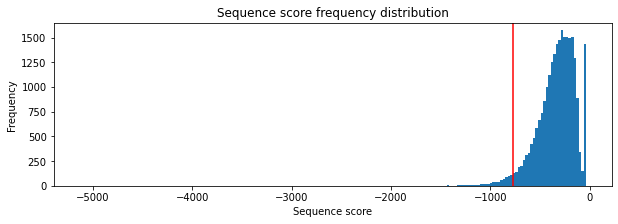

Training 9-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 926272
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	723104
Creating language model
Model vocab size:	18675
Total n-grams of size 9 in model:	 596973
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-785.6065661615307



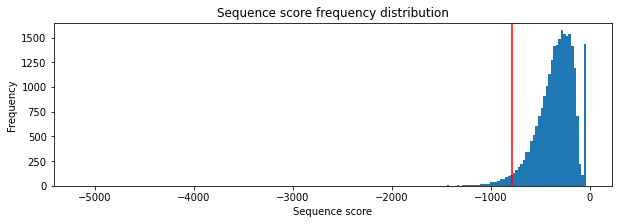

Training 10-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 977064
Flattened sequence set size	 35851
Vocabulary with <UNK> cutoff size	 18674
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	748500
Creating language model
Model vocab size:	18675
Total n-grams of size 10 in model:	 620699
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-798.8228130632663



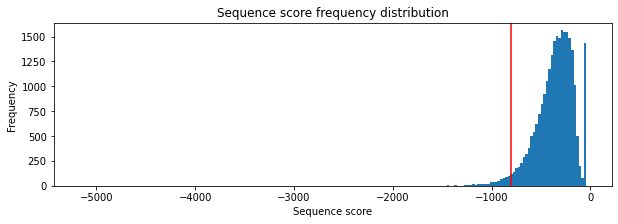

In [42]:
# Text n-gram model
ngram_data_text = train_lm(n_values, tokenized_clean_text_list, alpha=alpha)

Replacing tokens with POS tags using HMM
Training 1-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 519936
Flattened sequence set size	 312
Vocabulary with <UNK> cutoff size	 287
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	519936
Creating language model
Model vocab size:	288
Total n-grams of size 1 in model:	 287
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-283.21048999719557



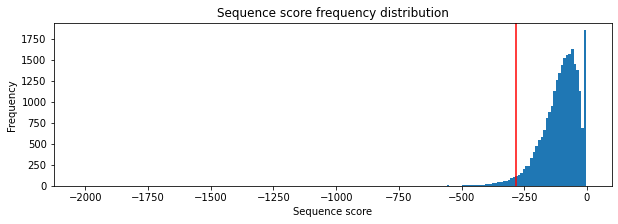

Training 2-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 570728
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	545332
Creating language model
Model vocab size:	290
Total n-grams of size 2 in model:	 288
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-212.40629392617402



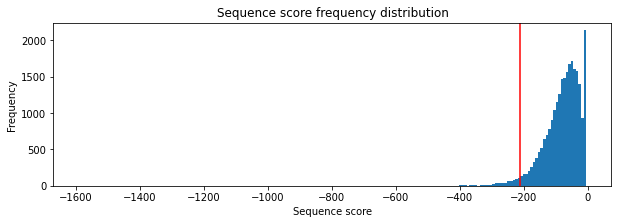

Training 3-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 621520
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	570728
Creating language model
Model vocab size:	290
Total n-grams of size 3 in model:	 9107
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-228.7138911164585



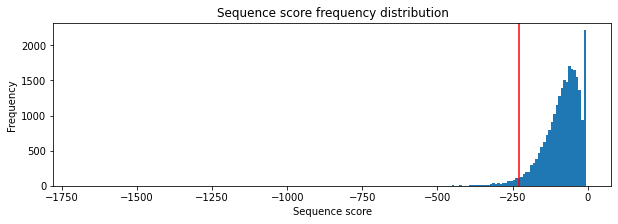

Training 4-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 672312
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	596124
Creating language model
Model vocab size:	290
Total n-grams of size 4 in model:	 54283
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-278.8390545558767



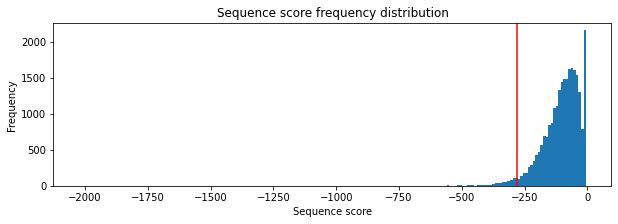

Training 5-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 723104
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	621520
Creating language model
Model vocab size:	290
Total n-grams of size 5 in model:	 150918
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-327.7048443041217



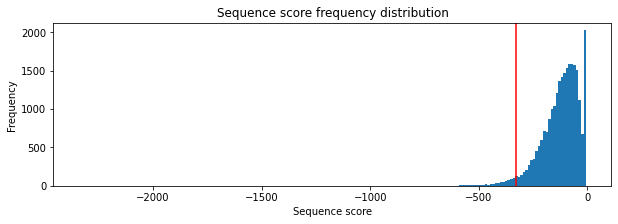

Training 6-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 773896
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	646916
Creating language model
Model vocab size:	290
Total n-grams of size 6 in model:	 268231
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-360.317447530394



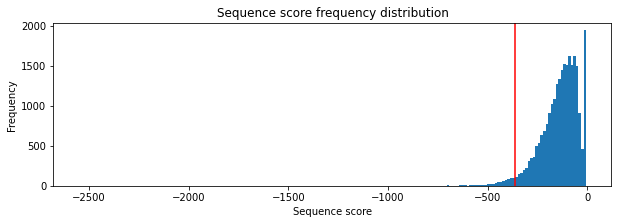

Training 7-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 824688
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	672312
Creating language model
Model vocab size:	290
Total n-grams of size 7 in model:	 363267
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-379.8008602008312



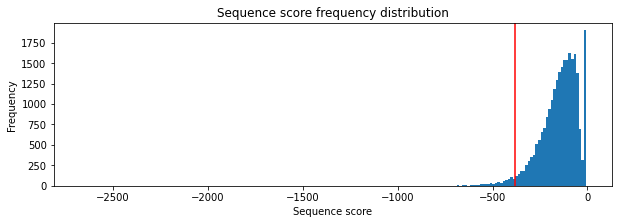

Training 8-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 875480
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	697708
Creating language model
Model vocab size:	290
Total n-grams of size 8 in model:	 426961
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-392.51033287886304



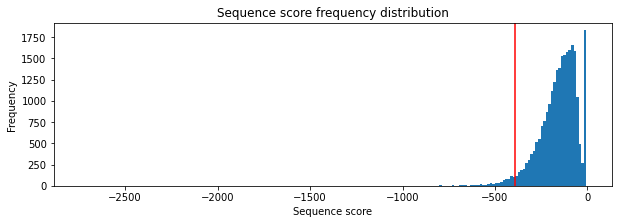

Training 9-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 926272
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	723104
Creating language model
Model vocab size:	290
Total n-grams of size 9 in model:	 468404
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-402.0620987955295



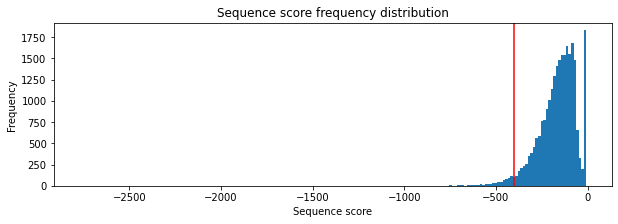

Training 10-gram model
Sequences in corpus:	25396
Total tokens in corpus:	519936
Padding sequences with <s> and </s> tokens
Creating vocabulary
Flattened sequence size	 977064
Flattened sequence set size	 314
Vocabulary with <UNK> cutoff size	 289
Creating n-grams
Total ngram sequences:	25396
Total ngrams:	748500
Creating language model
Model vocab size:	290
Total n-grams of size 10 in model:	 498290
Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	761/25396
Sequence score cutoff:	-409.4525630389876



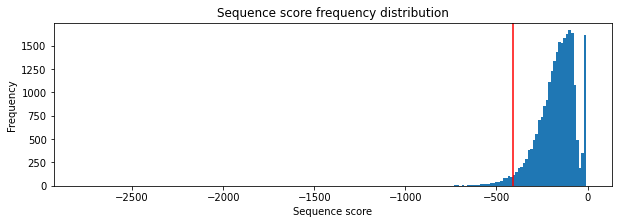

In [43]:
# POS tag n-gram model
clean_pos_tag_list = convert_to_pos_tags(tokenized_clean_text_list, pos_type=pos_type)
ngram_data_pos = train_lm(n_values, clean_pos_tag_list, alpha=alpha)

In [44]:
# Getting counts from n-gram model

# unigram counts
if 1 in n_values:
    print('Unigram count (<s>):\t', ngram_data_text[1]['model'].counts['<s>'])
    print('Unigram count (of):\t', ngram_data_text[1]['model'].counts['of'])
    print('Unigram count (the):\t', ngram_data_text[1]['model'].counts['the'])
    print('Unigram count (The):\t', ngram_data_text[1]['model'].counts['The'])
    print('Unigram count (<UNK>):\t', ngram_data_text[1]['model'].counts['<UNK>'])

# bigram counts
if 2 in n_values:
    print('\nBigram count (The | <s>):\t', ngram_data_text[2]['model'].counts[['<s>']]['The'])
    print('Bigram count (of | the):\t', ngram_data_text[2]['model'].counts[['of']]['the'])

# trigram counts
if 3 in n_values:
    print('\nTrigram count (The | </s> <s>):\t', ngram_data_text[3]['model'].counts[['<s>', '<s>']]['The'])

Unigram count (<s>):	 0
Unigram count (of):	 15977
Unigram count (the):	 27816
Unigram count (The):	 3161
Unigram count (<UNK>):	 17178

Bigram count (The | <s>):	 2783
Bigram count (of | the):	 4218

Trigram count (The | </s> <s>):	 2783


In [45]:
# Getting scores / conditional probabilities from n-gram model

# unigram scores
if 1 in n_values:
    print('Unigram score (<s>):\t', ngram_data_text[1]['model'].score('<s>'))
    print('Unigram score (of):\t', ngram_data_text[1]['model'].score('of'))
    print('Unigram score (the):\t', ngram_data_text[1]['model'].score('the'))
    print('Unigram score (The):\t', ngram_data_text[1]['model'].score('The'))
    print('Unigram score (<UNK>):\t', ngram_data_text[1]['model'].score('<UNK>'))

# bigram scores
if 2 in n_values:
    print('\nBigram score (The | <s>):\t', ngram_data_text[2]['model'].score('The', '<s>'.split()))
    print('Bigram score (of | the):\t', ngram_data_text[2]['model'].score('the', 'of'.split()))

# trigram scores
if 3 in n_values:
    print('\nTrigram score (The | </s> <s>):\t', ngram_data_text[3]['model'].score('The', '<s> <s>'.split()))

Unigram score (<s>):	 0.03189512243575581
Unigram score (of):	 0.02966530451589186
Unigram score (the):	 0.05164599923135336
Unigram score (The):	 0.005870677987185509
Unigram score (<UNK>):	 0.03189512243575581

Bigram score (The | <s>):	 0.06317079258469288
Bigram score (of | the):	 0.12175343414521528

Trigram score (The | </s> <s>):	 0.06317079258469288


In [46]:
# Logarithm of scores

# unigram logscore
if 1 in n_values:
    print('Unigram log score (<s>):\t', ngram_data_text[1]['model'].logscore('<s>'))
    print('Unigram log score (of):\t\t', ngram_data_text[1]['model'].logscore('of'))
    print('Unigram log score (the):\t', ngram_data_text[1]['model'].logscore('the'))
    print('Unigram log score (The):\t', ngram_data_text[1]['model'].logscore('The'))
    print('Unigram log score (<UNK>):\t', ngram_data_text[1]['model'].logscore('<UNK>'))

# bigram logscore
if 2 in n_values:
    print('\nBigram log score (The | <s>):\t', ngram_data_text[2]['model'].logscore('The', '<s>'.split()))
    print('Bigram log score (of | the):\t', ngram_data_text[2]['model'].logscore('the', 'of'.split()))

# trigram logscore
if 3 in n_values:
    print('\nTrigram log score (The | </s> <s>):\t', ngram_data_text[3]['model'].logscore('The', '<s> <s>'.split()))

Unigram log score (<s>):	 -4.970520373175608
Unigram log score (of):		 -5.075079597561273
Unigram log score (the):	 -4.27519959504336
Unigram log score (The):	 -7.412257159134673
Unigram log score (<UNK>):	 -4.970520373175608

Bigram log score (The | <s>):	 -3.9845985163876136
Bigram log score (of | the):	 -3.0379656297304676

Trigram log score (The | </s> <s>):	 -3.9845985163876136


## Model Evaluation

### Shannon Visualization

In [47]:
def get_sentence_from_tokens(tokens):
    filtered_tokens = []
    for token in tokens:
        if token in ['<s>', '</s>']:
            continue
        else:
            filtered_tokens.append(token)
    return ' '.join(filtered_tokens)

In [48]:
from nltk.probability import MLEProbDist

def shannon_visualization(n_value, model, max_len=50, verbose=False):
    sentence = ""
    if n_value == 1:
        # Unigram
        tokens = model.generate(max_len, random_seed=None)
        sentence = get_sentence_from_tokens(tokens)
        if verbose:
            print('1-gram:', sentence)
    else:
        if verbose:
            print(f'{n_value}-gram: ', end='')
        cur_tokens = ['<s>']*(n_value-1)
        sequence = []
        for _ in range(max_len):
            freq_dist = model.counts[cur_tokens]
            prob_dist = MLEProbDist(freq_dist)
            next_token = prob_dist.generate()
            if next_token == '</s>':
                break
            sequence.append(next_token)
            if verbose:
                print(next_token, end=' ')
            cur_tokens.pop(0)
            cur_tokens.append(next_token)
        sentence = ' '.join(sequence)
        if verbose:
            print()
    return sentence

In [49]:
for n_value in n_values:
    shannon_visualization(n_value, ngram_data_text[n_value]['model'], 50, verbose=True)
    print()

1-gram: , it from of of <UNK> that a what simple our Rock ? `` he B hypothetical snakes , technical indeed , authors than . cause ( be 7 the apparent and other was Our his a of it account while this distinctive particularly the <UNK> the based just you

2-gram: Determine the past the features but a <UNK> ) , a letter , they make an illustration . 

3-gram: At this moment she found a girl happen to be assimilated . 

4-gram: That made a certain amount of agreement on the major international problems that involve the interest of clarity , she typed into the record : `` Shot in the <UNK> `` . 

5-gram: `` She flew beautifully `` , said Fiedler . 

6-gram: <UNK> involved in an over-all concept That which follows will be a discussion of principles and possible content for an over-all concept of <UNK> warfare . 

7-gram: It is often stated that the submarine can be destroyed while building , at bases , in transit , and on station . 

8-gram: This relationship , however , is not maintained ce

### Evaluating unknown corpus

In [50]:
def analyse_test_corpus(tokenized_corpus, n_value, model, verbose=False):
    
    print(f'Sequences in corpus:\t{len(tokenized_corpus)}')
    total_tokens = 0
    for sequence in tokenized_corpus:
        total_tokens += len(sequence)
    print(f'Total tokens in corpus:\t{total_tokens}')
    
    # padding <s> and </s>
    print("Padding sequences with <s> and </s> tokens")
    padded_sequences = []
    total_tokens_with_padding = 0
    for i in range(len(tokenized_corpus)):
        padded_tokens = list(pad_sequence(tokenized_corpus[i],
                                          pad_left=True, left_pad_symbol="<s>",
                                          pad_right=True, right_pad_symbol="</s>",
                                          n=n_value))
        padded_sequences.append(padded_tokens)
        total_tokens_with_padding += len(padded_tokens)
    if verbose:
        print('eg.', padded_sequences[0])
    
    # grouping into group size of `n_value`
    print("Creating n-grams")
    ngram_sequences = []
    for text in padded_sequences:
        ngram_sequences.append(list(ngrams(text, n=n_value)))
    if verbose:
        print('eg.', ngram_sequences[0][:PRINT_LIMIT])
    
    total_ngrams = 0
    for sequence in ngram_sequences:
        total_ngrams += len(sequence)
    print(f'Total ngram sequences:\t{len(ngram_sequences)}\nTotal ngrams:\t{total_ngrams}')
    
    sequence_scores = []
    total_score = 0
    for ngram_sequence in ngram_sequences:
        sequence_score = 0
        for group in ngram_sequence:
            score = model.logscore(group[-1], group[:-1])
            sequence_score += score
        sequence_scores.append(sequence_score)
        total_score += sequence_score
    log_perplexity = -total_score/total_tokens_with_padding
    
    return {
        'padded_sequences': padded_sequences,
        'ngram_sequences': ngram_sequences,
        'sequence_scores': sequence_scores,
        'map_to_corpus_index': map_to_corpus_index,
        'perplexity': log_perplexity
    }    

In [51]:
def test_lm(test_corpus, n_values, ngram_data):
    ngram_results = dict()
    for n_value in n_values:
        print(f"Testing {n_value}-gram model")
        ngram_test_info = analyse_test_corpus(test_corpus, n_value, ngram_data[n_value]['model'], verbose=False)
        plot_continuous_freq_dist(ngram_test_info['sequence_scores'], xlabel='Sequence score', 
                                  ylabel='Frequency', title='Sequence score frequency distribution', bins=200,
                                  cutoff=ngram_data[n_value]['score_cutoff'])
        # filter_using_token_score(n_value, ngram_data[n_value]['model'], ngram_test_info['ngram_sequences'], token_log_cutoffs[n_value], verbose=True)
        suspect_sequences_indexes = filter_using_sequence_score(n_value, 
                                                   ngram_test_info['ngram_sequences'], 
                                                   ngram_test_info['sequence_scores'], 
                                                   ngram_data[n_value]['score_cutoff'], verbose=True)
        suspect_corpus_index = []
        for index in suspect_sequences_indexes:
            suspect_corpus_index.append(ngram_test_info['map_to_corpus_index'][index])
        suspect_corpus_index = set(suspect_corpus_index)

        ngram_results[n_value] = dict()
        ngram_results[n_value] = {
            'suspect_corpus_index': suspect_corpus_index,
            'padded_sequences': ngram_test_info['padded_sequences'],
            'suspect_sequences_index': suspect_sequences_indexes,
            'map_to_corpus_index': ngram_test_info['map_to_corpus_index'],
            'log_perplexity': ngram_test_info['perplexity'],
            'sequence_scores': ngram_test_info['sequence_scores']
        }
        print()
    return ngram_results

In [52]:
test_text_list = None

if test_text_list is None:
    test_text_list = unknown_text_list
segmented_corpus, map_to_corpus_index = segmentation(test_text_list)
tokenized_corpus = tokenization(segmented_corpus)

Testing 1-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	669821


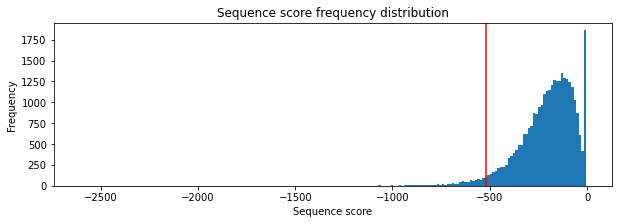

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	995/30868

Testing 2-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	700689


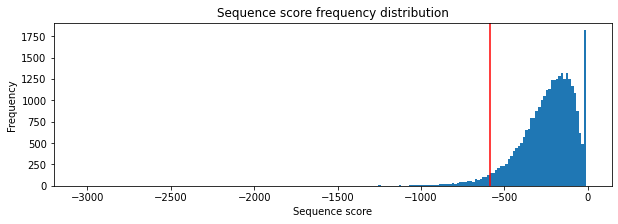

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1222/30868

Testing 3-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	731557


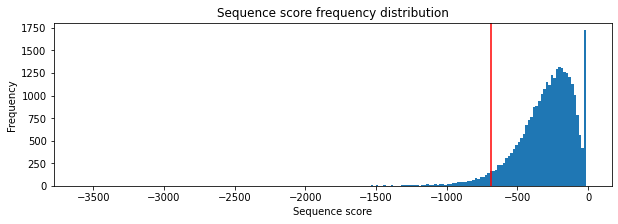

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1404/30868

Testing 4-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	762425


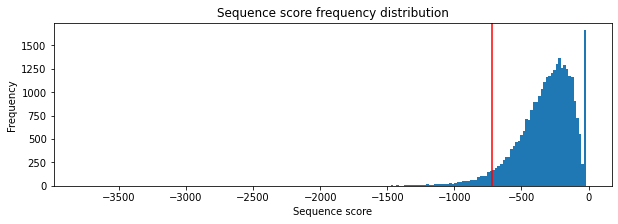

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1483/30868

Testing 5-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	793293


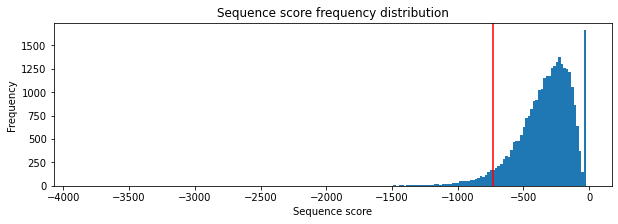

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1524/30868

Testing 6-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	824161


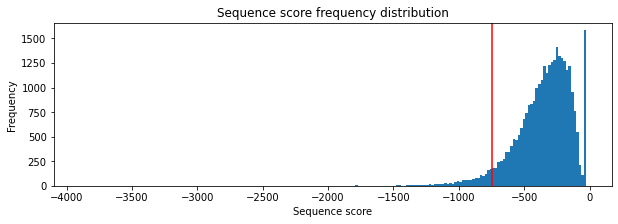

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1531/30868

Testing 7-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	855029


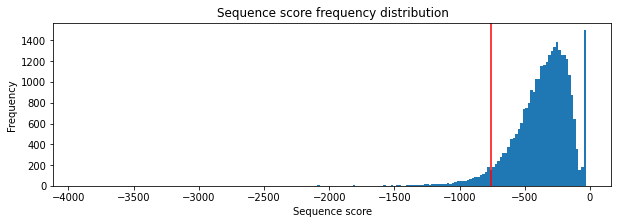

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1541/30868

Testing 8-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	885897


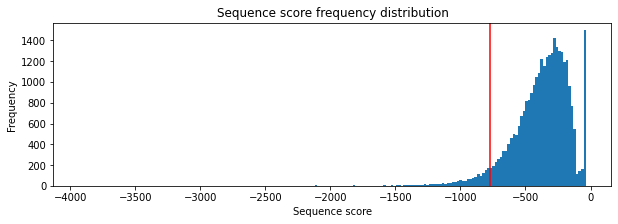

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1550/30868

Testing 9-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	916765


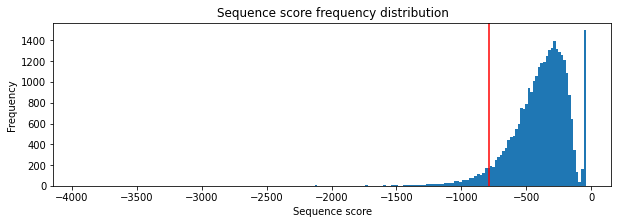

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1554/30868

Testing 10-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	947633


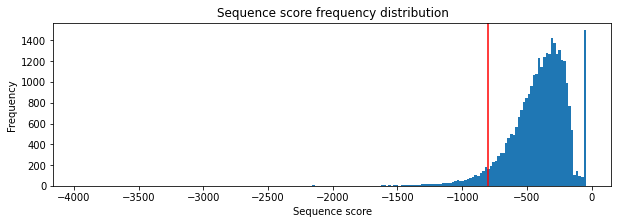

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1557/30868



In [53]:
# Text n-gram model
ngram_results_text = test_lm(tokenized_corpus, n_values, ngram_data_text)

Replacing tokens with POS tags using HMM
Testing 1-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	669821


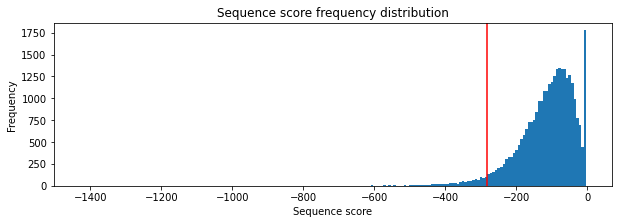

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1102/30868

Testing 2-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	700689


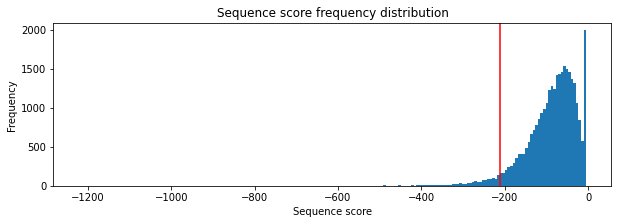

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1234/30868

Testing 3-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	731557


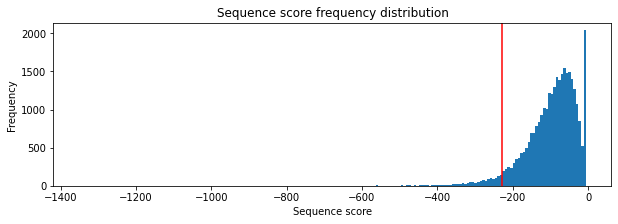

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1388/30868

Testing 4-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	762425


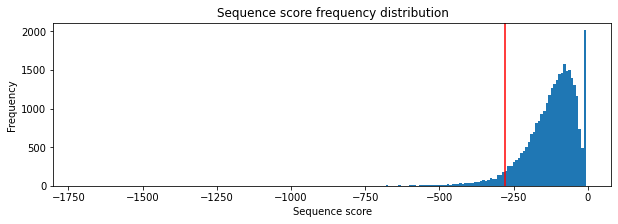

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1560/30868

Testing 5-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	793293


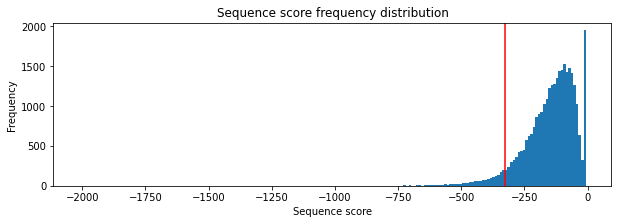

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1699/30868

Testing 6-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	824161


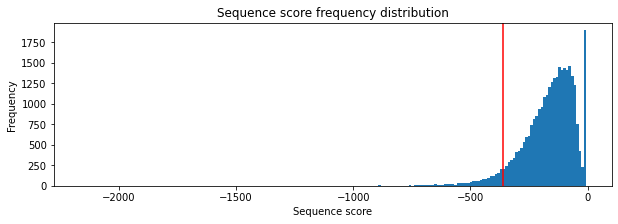

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1793/30868

Testing 7-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	855029


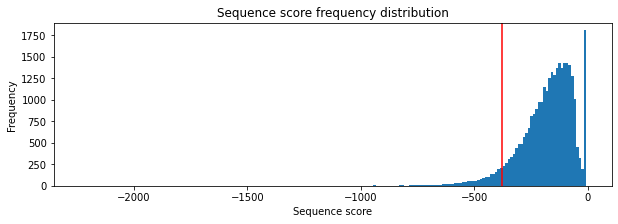

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1850/30868

Testing 8-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	885897


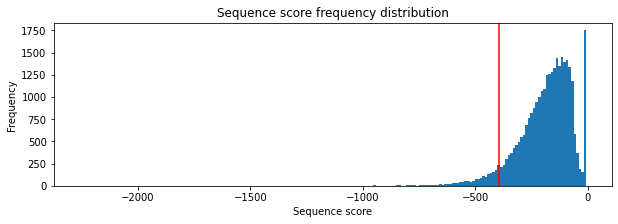

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1881/30868

Testing 9-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	916765


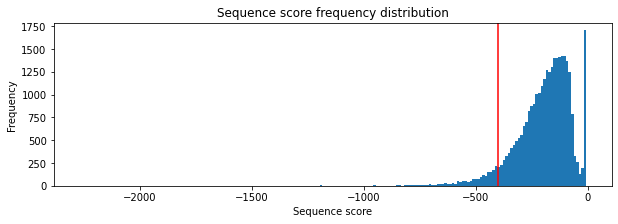

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1896/30868

Testing 10-gram model
Sequences in corpus:	30868
Total tokens in corpus:	669821
Padding sequences with <s> and </s> tokens
Creating n-grams
Total ngram sequences:	30868
Total ngrams:	947633


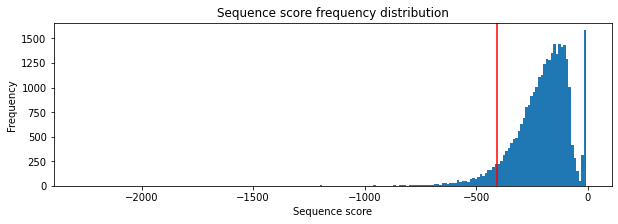

Filtering sequences based on sequence scores
Suspect sequences based on sequence scores:	1919/30868



In [54]:
# POS tag n-gram model
pos_corpus = convert_to_pos_tags(tokenized_corpus, pos_type=pos_type)
ngram_results_pos = test_lm(pos_corpus, n_values, ngram_data_pos)

In [55]:
def print_stats(text_list, n_values, ngram_results, indexes=None):
    print('Total text files in unknown corpus:\t\t', len(text_list))
    print('Total sequence generated from unknown corpus:\t', len(ngram_results[n_values[-1]]['padded_sequences']))
    for n_value in n_values:
        print(f'{n_value}-gram')
        print('Total suspect sequences:\t\t\t', len(ngram_results[n_value]['suspect_sequences_index']))
        print('Total suspect files:\t\t\t\t', len(ngram_results[n_value]['suspect_corpus_index']))
        if indexes is None:
            return
        elif indexes == 'all':
            for index in range(len(text_list)):
                print(f"\t{index}:\t{index in ngram_results[n_value]['suspect_corpus_index']}")
        else:
            for index in indexes:
                print(f"\t{index}:\t{index in ngram_results[n_value]['suspect_corpus_index']}")

In [56]:
# print_stats(test_text_list, n_values, ngram_results_text)
# print_stats(test_text_list, n_values, ngram_results_text, indexes='all')
print_stats(test_text_list, n_values, ngram_results_text, indexes=[i for i in range(min(3, len(test_text_list)))])

Total text files in unknown corpus:		 8698
Total sequence generated from unknown corpus:	 30868
1-gram
Total suspect sequences:			 995
Total suspect files:				 831
	0:	False
	1:	True
	2:	False
2-gram
Total suspect sequences:			 1222
Total suspect files:				 1002
	0:	False
	1:	True
	2:	False
3-gram
Total suspect sequences:			 1404
Total suspect files:				 1135
	0:	False
	1:	True
	2:	False
4-gram
Total suspect sequences:			 1483
Total suspect files:				 1190
	0:	False
	1:	True
	2:	False
5-gram
Total suspect sequences:			 1524
Total suspect files:				 1214
	0:	False
	1:	True
	2:	False
6-gram
Total suspect sequences:			 1531
Total suspect files:				 1220
	0:	False
	1:	True
	2:	False
7-gram
Total suspect sequences:			 1541
Total suspect files:				 1227
	0:	False
	1:	True
	2:	False
8-gram
Total suspect sequences:			 1550
Total suspect files:				 1234
	0:	False
	1:	True
	2:	False
9-gram
Total suspect sequences:			 1554
Total suspect files:				 1237
	0:	False
	1:	True
	2:	False
10-gram
Total s

In [57]:
# print_stats(test_text_list, n_values, ngram_results_pos)
# print_stats(test_text_list, n_values, ngram_results_pos, indexes='all')
print_stats(test_text_list, n_values, ngram_results_pos, indexes=[i for i in range(min(3, len(test_text_list)))])

Total text files in unknown corpus:		 8698
Total sequence generated from unknown corpus:	 30868
1-gram
Total suspect sequences:			 1102
Total suspect files:				 905
	0:	False
	1:	True
	2:	False
2-gram
Total suspect sequences:			 1234
Total suspect files:				 1007
	0:	False
	1:	True
	2:	False
3-gram
Total suspect sequences:			 1388
Total suspect files:				 1114
	0:	False
	1:	True
	2:	False
4-gram
Total suspect sequences:			 1560
Total suspect files:				 1246
	0:	False
	1:	True
	2:	False
5-gram
Total suspect sequences:			 1699
Total suspect files:				 1338
	0:	False
	1:	True
	2:	False
6-gram
Total suspect sequences:			 1793
Total suspect files:				 1418
	0:	False
	1:	True
	2:	False
7-gram
Total suspect sequences:			 1850
Total suspect files:				 1453
	0:	False
	1:	True
	2:	False
8-gram
Total suspect sequences:			 1881
Total suspect files:				 1472
	0:	False
	1:	True
	2:	False
9-gram
Total suspect sequences:			 1896
Total suspect files:				 1482
	0:	False
	1:	True
	2:	False
10-gram
Total 

In [58]:
common_suspects = dict()
print(f"Size of combined suspect set:")
for n_value in n_values:
    common_suspects[n_value] = list(set(ngram_results_text[n_value]['suspect_corpus_index']) & set(ngram_results_pos[n_value]['suspect_corpus_index']))
    print(f"\t{n_value}-gram: {len(common_suspects[n_value])}/{len(test_text_list)}")

Size of combined suspect set:
	1-gram: 735/8698
	2-gram: 851/8698
	3-gram: 937/8698
	4-gram: 1026/8698
	5-gram: 1099/8698
	6-gram: 1166/8698
	7-gram: 1202/8698
	8-gram: 1221/8698
	9-gram: 1228/8698
	10-gram: 1232/8698


### Log perplexity

In [59]:
print("Text n-gram model log perplexities:")
for n_value in n_values:
    print(f"\t{n_value}-gram perplexity =", ngram_results_text[n_value]['log_perplexity'])

print("\nPOS tag n-gram model log perplexities:")
for n_value in n_values:
    print(f"\t{n_value}-gram perplexity =", ngram_results_pos[n_value]['log_perplexity'])

Text n-gram model log perplexities:
	1-gram perplexity = 9.431800761246446
	2-gram perplexity = 10.209067998891697
	3-gram perplexity = 11.530804734297359
	4-gram perplexity = 11.56637343780164
	5-gram perplexity = 11.303994900390192
	6-gram perplexity = 11.029852920732152
	7-gram perplexity = 10.782343210901653
	8-gram perplexity = 10.561753210071885
	9-gram perplexity = 10.364395739590872
	10-gram perplexity = 10.186853082528733

POS tag n-gram model log perplexities:
	1-gram perplexity = 5.248471429761425
	2-gram perplexity = 3.697171775338458
	3-gram perplexity = 3.7728874564200696
	4-gram perplexity = 4.391399658426517
	5-gram perplexity = 4.954386574264282
	6-gram perplexity = 5.234637376808129
	7-gram perplexity = 5.307059717625388
	8-gram perplexity = 5.281285794596146
	9-gram perplexity = 5.222158244781763
	10-gram perplexity = 5.157382749360958


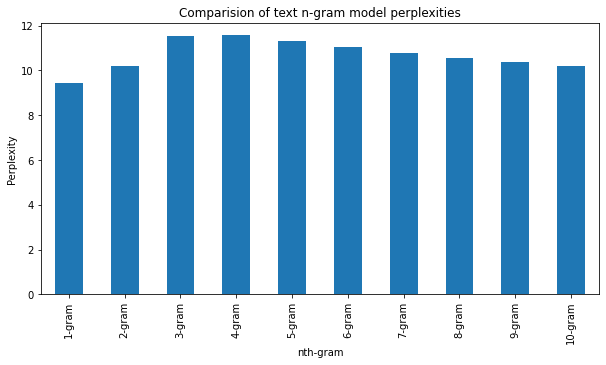

In [61]:
text_n_gram_perplexities = []
for n_value in n_values:
    text_n_gram_perplexities.append(ngram_results_text[n_value]['log_perplexity'])

freq_series = pd.Series(text_n_gram_perplexities)
x_labels = [f'{n_value}-gram' for n_value in n_values]
plt.figure(figsize=(10, 5))
ax = freq_series.plot(kind="bar")
ax.set_title("Comparision of text n-gram model perplexities")
ax.set_xlabel("nth-gram")
ax.set_ylabel("Perplexity")
ax.set_xticklabels(x_labels)
rects = ax.patches
plt.show()

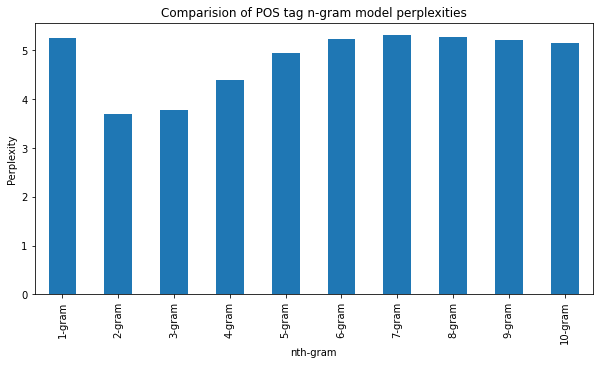

In [62]:
pos_perplexities = []
for n_value in n_values:
    pos_perplexities.append(ngram_results_pos[n_value]['log_perplexity'])

freq_series = pd.Series(pos_perplexities)
x_labels = [f'{n_value}-gram' for n_value in n_values]
plt.figure(figsize=(10, 5))
ax = freq_series.plot(kind="bar")
ax.set_title("Comparision of POS tag n-gram model perplexities")
ax.set_xlabel("nth-gram")
ax.set_ylabel("Perplexity")
ax.set_xticklabels(x_labels)
rects = ax.patches
plt.show()

### Output

#### Displaying random segments classified as suspect by models

In [63]:
def print_corpus_text_from_suspect_sequence_index_(index, corpus, n_value, ngram_results):
    assert 0<=index and index<len(ngram_results[n_value]['suspect_sequences_index'])
    sequence_index = ngram_results[n_value]['suspect_sequences_index'][index]
    print('Segment:\n', get_sentence_from_tokens(ngram_results[n_value]['padded_sequences'][sequence_index]))
    corpus_index = ngram_results[n_value]['map_to_corpus_index'][sequence_index]
    print('\nText in corpus:\n', corpus[corpus_index])

In [64]:
# Text n-gram model
print_corpus_text_from_suspect_sequence_index_(index=10, corpus=test_text_list, n_value=3, 
                                               ngram_results=ngram_results_text)

Segment:
 Though he struggled with philosophy all his life , he never got much beyond the pessimism of his twenties ; ; the ` ` sober opinion `` of his letter to Noyes , written when Hardy was eighty years old , is essentially that of hissing first ` ` philosophical `` notebook entry , made when he was twenty - five : ` ` The world does not despise us : it only neglects us `` ( Early Life , p. 63 ) .

Text in corpus:
 is not , however , the case , and development is a term which we can apply to Hardy only in a very limited sense . In a time when poetic style , and poetic belief as well , seem in a state of continual flux , Hardies stands out as a poet of almost perverse consistency . Though he struggled with philosophy all his life , he never got much beyond the pessimism of his twenties ; ; the ` ` sober opinion '' of his letter to Noyes , written when Hardy was eighty years old , is essentially that of hissing first ` ` philosophical '' notebook entry , made when he was twenty - five

In [65]:
# POS tag n-gram model
print_corpus_text_from_suspect_sequence_index_(index=10, corpus=test_text_list, n_value=3, 
                                               ngram_results=ngram_results_pos)

Segment:
 UNK VBZ JJ WRB PN VBZ CS PPS VBD NN RBR CS DTI AP JJ UNK NN : UNK UNK UNK `` BEZ VBN UNK UNK IN-TL CD CC CD `` . . UNK UNK UNK UNK UNK UNK `` BEZ VBN UNK ,-HL CD .

Text in corpus:
 So fars these remarks , like most criticisms of Hardy , have tacitly assumed that his poetry is all of a piece , one solid mass of verse expressing a sensibility at a single stage of development . For critics , Hardy has had no poetic periods -- one does not speak of early Hardy or late Hardy , or of the London or Max Gate period , but simply of Hardy , as of a poetic monolith . This seems odd when one recalls that he wrote poetry longer than any other major English poet : ` ` Domicilium '' is dated ` ` between 1857 and 1860 '' ; ; ` ` Seeing The Moonest Rise '' is dated August , 1927 . One might expect that in a poetic career of seventy - odd years , some changes in style and method would have occurred , some development taken place .


#### Testing if a sentence in corpus is classified as suspect by both models (text, POS tag)

In [73]:
# Check if sentence in test corpus is grammatically correct
corpus_index_to_check = 0
print(test_text_list[corpus_index_to_check]) 
for n_value in n_values:
    print(f'\t{n_value}-gram: \t{corpus_index_to_check in common_suspects[n_value]}') 

The Fulton County Grand Jury say Friday an investigation of Atlanta 's recent primary election produced ` ` no evidence '' that any irregularities took place .
	1-gram: 	False
	2-gram: 	False
	3-gram: 	False
	4-gram: 	False
	5-gram: 	False
	6-gram: 	False
	7-gram: 	False
	8-gram: 	False
	9-gram: 	False
	10-gram: 	False


### Saving model

In [67]:
import dill as pickle 

for n_value in n_values:
    with open(os.path.join(BASE_DIR, 'models', f'{n_value}_gram_text.pkl'), 'wb') as fout:
        pickle.dump(ngram_data_text[n_value]['model'], fout)
        
for n_value in n_values:
    with open(os.path.join(BASE_DIR, 'models', f'{n_value}_gram_pos.pkl'), 'wb') as fout:
        pickle.dump(ngram_data_pos[n_value]['model'], fout)

## Contribution
- Adarsh Nandanwar [2018A7PS0396G] - Language Model (n-gram) Train and Test, Language Model Evaluation
- Yash Narang [2018A7PS0150G] - POS Tagging: Hidden Markov Model
- Manav Mehta [2018A7PS0164G] - Dataset Analysis
- Aditya Jain [2018A7PS0243G] - POS Tagging: Spacy, Perplexity Calculation
- Pranav Gaur [2018A7PS0099G] - POS Tagging: Spacy, Perplexity Calculation